# Работа по дисциплине Машинное обучение: kaggle competition

Выполнили: Рутин Василий, Гордеев Станислав.

## 1. Постановка задачи

Поучавствовать в соревновании по машинному обучению от kaggle.

Kaggle.com предлагает множество задач по классификации и регрессии. Задачи делятся на 4 типа:
- Тренировочные для новичков
- Игровые
- Оплачиваемые
- Для поиска соискателей

Среди соревнований, доступных на момент написания данной работы, было выбрано из раздела playground, то есть игровая.<br>
https://www.kaggle.com/c/house-prices-advanced-regression-techniques 

Задача состоит в определении стомости недвижимости на основе различных данных (тип объекта, наличие фундамента, расположение, количество комнат, квадратных метров и т .д.)


После того, как будет написан классификатор-регрессор, необходимо отослать спрогнозированные решения на сервер, где будет осуществлена оценка.

## 2. Исходные данные

Среди исходных данных доступно 4 файла:
- data_description.txt - описание датасета
- train.csv - обучающая выборка
- test.csv - целевая выборка, по которой нужно сделать прогноз
- sample_submission.csv - пример формата для отправки на сервер

Рассмотрим сами данные:
- Количество строк в обучающей выборке: 1460
- Количество строк в целевой выборке: 1459
- Атрибутов: 80 + целевое (стоимость объекта)
- Категорийных атрибутов: 46
- Пропущенные значения: присутствуют

Описание атрибутов (подробнее см. в прилагаеммых файлах).
<br>MSSubClass: Identifies the type of dwelling involved in the sale.
<br>MSZoning: Identifies the general zoning classification of the sale.
<br>LotFrontage: Linear feet of street connected to property
<br>LotArea: Lot size in square feet
<br>Street: Type of road access to property
<br>Alley: Type of alley access to property
<br>LotShape: General shape of property
<br>LandContour: Flatness of the property
<br>Utilities: Type of utilities available
<br>LotConfig: Lot configuration
<br>LandSlope: Slope of property
<br>Neighborhood: Physical locations within Ames city limits
<br>Condition1: Proximity to various conditions
<br>Condition2: Proximity to various conditions (if more than one is present)
<br>BldgType: Type of dwelling
<br>HouseStyle: Style of dwelling
<br>OverallQual: Rates the overall material and finish of the house
<br>OverallCond: Rates the overall condition of the house
<br>YearBuilt: Original construction date
<br>YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
<br>RoofStyle: Type of roof
<br>RoofMatl: Roof material
<br>Exterior1st: Exterior covering on house
<br>Exterior2nd: Exterior covering on house (if more than one material)
<br>MasVnrType: Masonry veneer type
<br>MasVnrArea: Masonry veneer area in square feet
<br>ExterQual: Evaluates the quality of the material on the exterior 
<br>ExterCond: Evaluates the present condition of the material on the exterior
<br>Foundation: Type of foundation
<br>BsmtQual: Evaluates the height of the basement
<br>BsmtCond: Evaluates the general condition of the basement
<br>BsmtExposure: Refers to walkout or garden level walls
<br>BsmtFinType1: Rating of basement finished area
<br>BsmtFinSF1: Type 1 finished square feet
<br>BsmtFinType2: Rating of basement finished area (if multiple types)
<br>BsmtFinSF2: Type 2 finished square feet
<br>BsmtUnfSF: Unfinished square feet of basement area
<br>TotalBsmtSF: Total square feet of basement area
<br>Heating: Type of heating
<br>HeatingQC: Heating quality and condition
<br>CentralAir: Central air conditioning
<br>Electrical: Electrical system
<br>1stFlrSF: First Floor square feet 
<br>2ndFlrSF: Second floor square feet
<br>LowQualFinSF: Low quality finished square feet (all floors)
<br>GrLivArea: Above grade (ground) living area square feet
<br>BsmtFullBath: Basement full bathrooms
<br>BsmtHalfBath: Basement half bathrooms
<br>FullBath: Full bathrooms above grade
<br>HalfBath: Half baths above grade
<br>BedroomAbvGr: Bedrooms above grade (does NOT include basement bedrooms)
<br>KitchenAbvGr: Kitchens above grade
<br>KitchenQual: Kitchen quality
<br>TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
<br>Functional: Home functionality (Assume typical unless deductions are warranted)
<br>Fireplaces: Number of fireplaces
<br>FireplaceQu: Fireplace quality
<br>GarageType: Garage location
<br>GarageYrBlt: Year garage was built
<br>GarageFinish: Interior finish of the garage
<br>GarageCars: Size of garage in car capacity
<br>GarageArea: Size of garage in square feet
<br>GarageQual: Garage quality
<br>GarageCond: Garage condition
<br>PavedDrive: Paved driveway
<br>WoodDeckSF: Wood deck area in square feet
<br>OpenPorchSF: Open porch area in square feet
<br>EnclosedPorch: Enclosed porch area in square feet
<br>3SsnPorch: Three season porch area in square feet
<br>ScreenPorch: Screen porch area in square feet
<br>PoolArea: Pool area in square feet
<br>PoolQC: Pool quality
<br>Fence: Fence quality
<br>MiscFeature: Miscellaneous feature not covered in other categories
<br>MiscVal: $Value of miscellaneous feature
<br>MoSold: Month Sold (MM)
<br>YrSold: Year Sold (YYYY)
<br>SaleType: Type of sale
<br>SaleCondition: Condition of sale

## 3. Чистка и анализ данных

 \* Поскольку работа выполняет по дисциплине "Машинное обучение" разделу анализа данных уделено минимальное количество внимания.

Считаем датасет:

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")


df_train = pd.read_csv('train.csv', header=0)
df_train = pd.read_csv('train.csv', header=0)
df_target = pd.read_csv('test.csv', header=0)
df_target['SalePrice'] = None
print(df_train.shape)
print(df_target.shape)


(1460, 81)
(1459, 81)


Видим, что количество объектов совпадает с заявленным. Посмотрим на сами объекты:

In [2]:
df_train[:10]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


Пропущенные значения видно невооруженным взглядом. Дополнительная проверка:

In [3]:
df_train.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
Street           False
Alley             True
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType        True
MasVnrArea        True
ExterQual        False
ExterCond        False
Foundation       False
                 ...  
BedroomAbvGr     False
KitchenAbvGr     False
KitchenQual      False
TotRmsAbvGrd     False
Functional       False
Fireplaces       False
FireplaceQu       True
GarageType        True
GarageYrBlt       True
GarageFinish      True
GarageCars       False
GarageArea       False
GarageQual 

Производим чистку и заполняем пропущенные значения. Заполнять будет либо средним значением, либо стандартным, если такое указано в файле-описании, либо наиболее частотным, в зависимости от ситуации.

In [4]:
df = df_train
df.loc[df.LotFrontage.isnull(), "LotFrontage"] = df.loc[df.LotFrontage.notnull(), "LotFrontage"].median()
df.loc[df.Alley.isnull(), "Alley"] = 'NoAC'
df.loc[df.MasVnrType.isnull(), "MasVnrType"] = 'NoVen'
df.loc[df.MasVnrArea.isnull(), "MasVnrArea"] = 0
df.loc[df.BsmtQual.isnull(), "BsmtQual"] = 'NoBsmt'
df.loc[df.BsmtCond.isnull(), "BsmtCond"] = 'NoBsmt'
df.loc[df.BsmtExposure.isnull(), "BsmtExposure"] = 'NoBsmt'
df.loc[df.BsmtFinType1.isnull(), "BsmtFinType1"] = 'NoBsmt'
df.loc[df.BsmtFinType2.isnull(), "BsmtFinType2"] = 'NoBsmt'
df.loc[df.Electrical.isnull(), "Electrical"] = 'Mix'
df.loc[df.FireplaceQu.isnull(), "FireplaceQu"] = 'noFrp'
df.loc[df.GarageType.isnull(), "GarageType"] = 'noGrg'
df.loc[df.GarageYrBlt.isnull(), "GarageYrBlt"] = df.loc[df.GarageYrBlt.isnull(), "YearBuilt"]
df.loc[df.GarageFinish.isnull(), "GarageFinish"] = 'noGrg'
df.loc[df.GarageQual.isnull(), "GarageQual"] = 'noGrg'
df.loc[df.GarageCond.isnull(), "GarageCond"] = 'noGrg'
df.loc[df.GarageCars.isnull(), "GarageCars"] = 0
df.loc[df.GarageArea.isnull(), "GarageArea"] = 0
df.loc[df.PoolQC.isnull(), "PoolQC"] = 'noPol'
df.loc[df.Fence.isnull(), "Fence"] = 'noFnc'
df.loc[df.MiscFeature.isnull(), "MiscFeature"] = 'noMsc'

Проверяем:

In [5]:
df.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage      False
LotArea          False
Street           False
Alley            False
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType       False
MasVnrArea       False
ExterQual        False
ExterCond        False
Foundation       False
                 ...  
BedroomAbvGr     False
KitchenAbvGr     False
KitchenQual      False
TotRmsAbvGrd     False
Functional       False
Fireplaces       False
FireplaceQu      False
GarageType       False
GarageYrBlt      False
GarageFinish     False
GarageCars       False
GarageArea       False
GarageQual 

Выглядит гораздо лучше. Посмотрим на частотность наиболее интересных атрибутов:

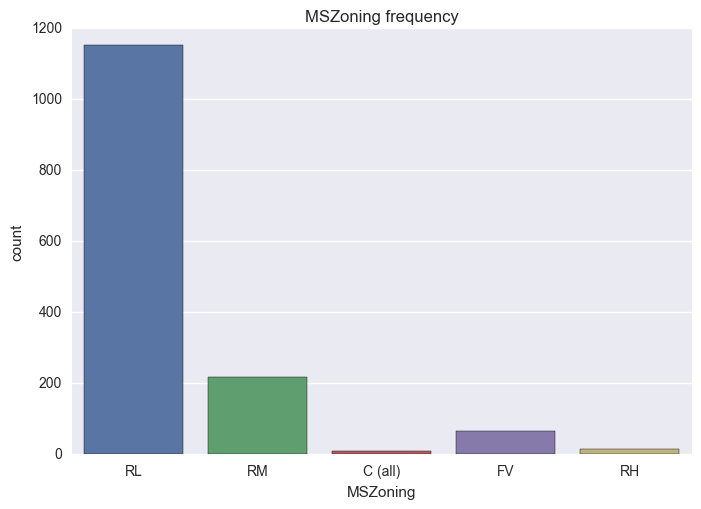

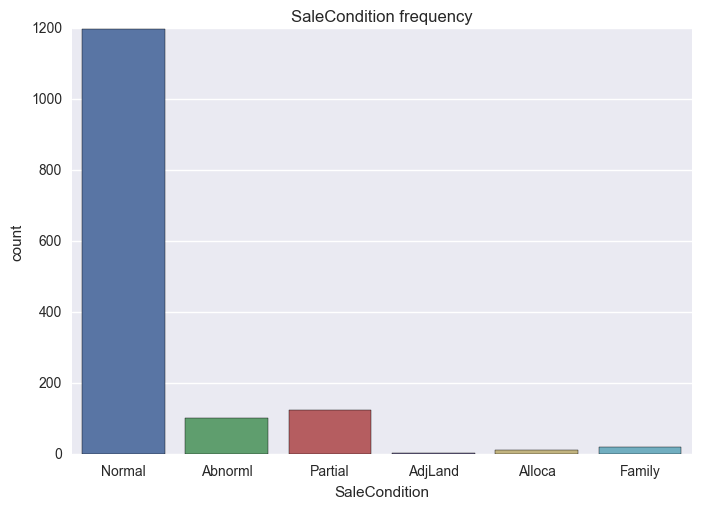

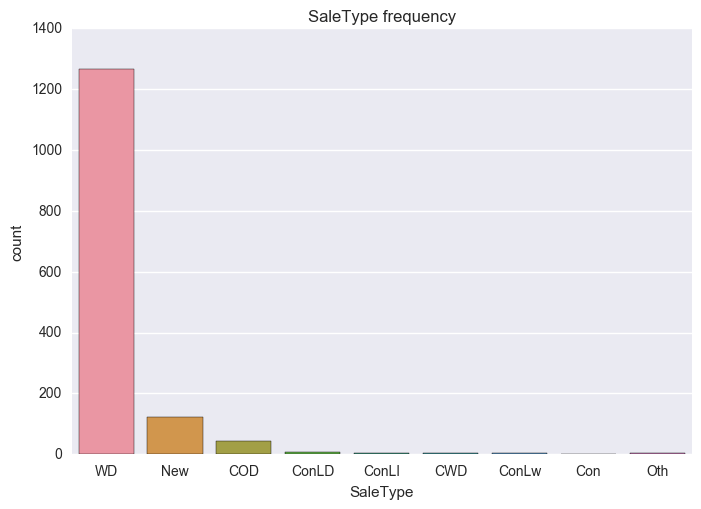

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")
data_slices = ['MSZoning', 'SaleCondition', 'SaleType']
for dsl in data_slices:
    ax = sns.countplot(x=dsl, data=df)
    sns.plt.title(dsl + " frequency")
    plt.show()




Похожая ситуация обстоит и с остальными атрибутами. Как правило, сильно преобладает один из них.<br>
Посмотрим на график зависимости стоимости недвижимости от года постройки.

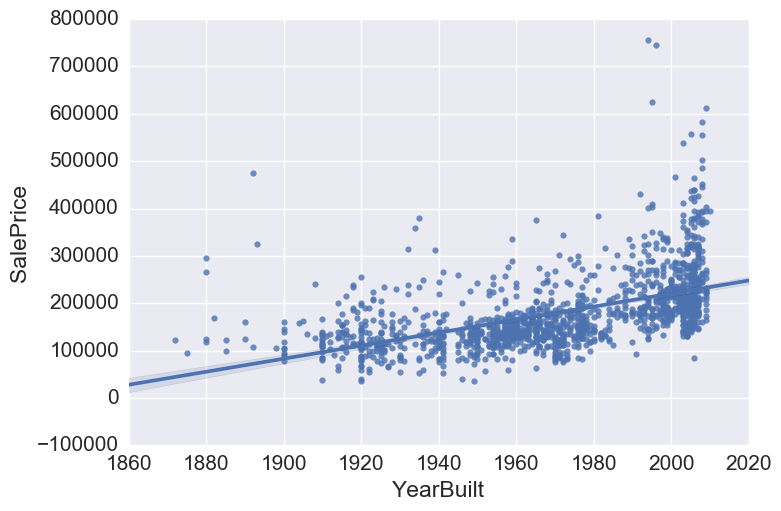

In [7]:
with sns.plotting_context("notebook",font_scale=1.5):
    sns.set_style("darkgrid")
    sns.regplot(x="YearBuilt", y="SalePrice", data=df)
#     plt.xlim((15,100))
    plt.show()

Данные разбросаны, но общие закономерности наблюдаются. Посмотрим на другие графики:

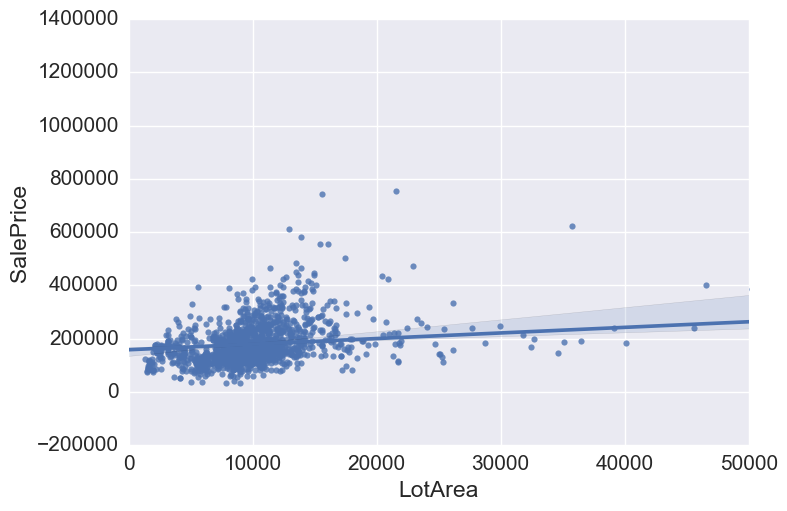

In [8]:
with sns.plotting_context("notebook",font_scale=1.5):
    sns.set_style("darkgrid")
    sns.regplot(x="LotArea", y="SalePrice", data=df)
    plt.xlim((0,50000))
    plt.show()

Здесь уже хуже. Количество квадратных метров значительно хуже влияет на результат. <br>

Может быть площадь каменной кладки влияет на стоимость?

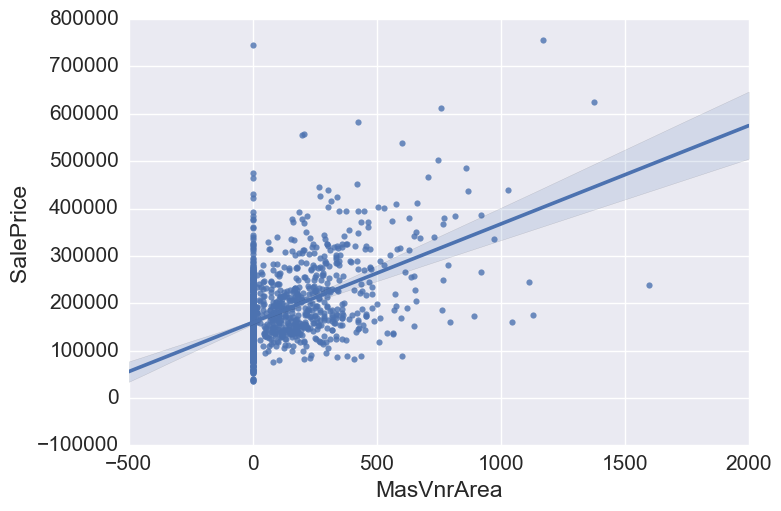

In [9]:
with sns.plotting_context("notebook",font_scale=1.5):
    sns.set_style("darkgrid")
    sns.regplot(x="MasVnrArea", y="SalePrice", data=df)
#     plt.xlim((0,5))
    plt.show()

В ходе выполнения работы были произведены аналогичные действия по просмотру и анализу графиков, в результате чего были сделан вывод, что не все параметры прямо влияют на результат.

Так же у нас есть категорийные атрибуты. Заменим их строковые представления на числовые и посмотрим на нашу табличку с данными.

In [10]:
def transform_categorical_feature(dataset, feature_name):
    feature_unique_list = list(enumerate(np.unique(dataset[feature_name])))
    feature_dict = {name: i for i, name in feature_unique_list}
    dataset[feature_name] = dataset[feature_name].map(lambda x: feature_dict[x]).astype(int)
    

categorical_features = ['MSZoning', 'Street', 'Alley', 'LandContour', 'Utilities', 'LotConfig',
                        'LandSlope', 'Neighborhood', 'LotShape', 'Condition1', 'Condition2', 'BldgType',
                        'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
                        'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
                        'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
                        'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish',
                        'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType',
                        'SaleCondition']
for categorical_feature in categorical_features:
    transform_categorical_feature(df, categorical_feature)
    
df[:10]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,1,3,3,0,...,0,3,4,4,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,1,3,3,0,...,0,3,4,4,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,1,0,3,0,...,0,3,4,4,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,1,0,3,0,...,0,3,4,4,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,1,0,3,0,...,0,3,4,4,0,12,2008,8,4,250000
5,6,50,3,85.0,14115,1,1,0,3,0,...,0,3,2,2,700,10,2009,8,4,143000
6,7,20,3,75.0,10084,1,1,3,3,0,...,0,3,4,4,0,8,2007,8,4,307000
7,8,60,3,69.0,10382,1,1,0,3,0,...,0,3,4,2,350,11,2009,8,4,200000
8,9,50,4,51.0,6120,1,1,3,3,0,...,0,3,4,4,0,4,2008,8,0,129900
9,10,190,3,50.0,7420,1,1,3,3,0,...,0,3,4,4,0,1,2008,8,4,118000


В итоге был написан класс, которые загружает и хранит датасет. Все категорийные атрибуты заменены бинарными векторами, как того требует библиотека sklearn.

In [11]:
from copy import copy

import numpy as np
import pandas as pd


class DataPreprocessor:

    def __init__(self):
        self.__transform_dicts = dict()
        self.target_inputs = None
        self.train_inputs = None
        self.train_outputs = None
        self.target_set = None
        self.target_df = None

    def read_all(self):
        df_train = pd.read_csv('train.csv', header=0)
        df_target = pd.read_csv('test.csv', header=0)
        df_target['SalePrice'] = None
        self.target_df = df_target
        train_len = df_train.shape[0]
        target_len = df_target.shape[0]
        df = df_train
        df = df.append(copy(df_target))
        # Заменяем пропущенные значения
        #
        df.loc[df.LotFrontage.isnull(), "LotFrontage"] = df.loc[df.LotFrontage.notnull(), "LotFrontage"].median()
        df.loc[df.Alley.isnull(), "Alley"] = 'NoAC'
        df.loc[df.MasVnrType.isnull(), "MasVnrType"] = 'NoVen'
        df.loc[df.MasVnrArea.isnull(), "MasVnrArea"] = 0
        df.loc[df.BsmtQual.isnull(), "BsmtQual"] = 'NoBsmt'
        df.loc[df.BsmtCond.isnull(), "BsmtCond"] = 'NoBsmt'
        df.loc[df.BsmtExposure.isnull(), "BsmtExposure"] = 'NoBsmt'
        df.loc[df.BsmtFinType1.isnull(), "BsmtFinType1"] = 'NoBsmt'
        df.loc[df.BsmtFinType2.isnull(), "BsmtFinType2"] = 'NoBsmt'
        df.loc[df.Electrical.isnull(), "Electrical"] = 'Mix'
        df.loc[df.FireplaceQu.isnull(), "FireplaceQu"] = 'noFrp'
        df.loc[df.GarageType.isnull(), "GarageType"] = 'noGrg'
        df.loc[df.GarageYrBlt.isnull(), "GarageYrBlt"] = df.loc[df.GarageYrBlt.isnull(), "YearBuilt"]
        df.loc[df.GarageFinish.isnull(), "GarageFinish"] = 'noGrg'
        df.loc[df.GarageQual.isnull(), "GarageQual"] = 'noGrg'
        df.loc[df.GarageCond.isnull(), "GarageCond"] = 'noGrg'
        df.loc[df.GarageCars.isnull(), "GarageCars"] = 0
        df.loc[df.GarageArea.isnull(), "GarageArea"] = 0
        df.loc[df.PoolQC.isnull(), "PoolQC"] = 'noPol'
        df.loc[df.Fence.isnull(), "Fence"] = 'noFnc'
        df.loc[df.MiscFeature.isnull(), "MiscFeature"] = 'noMsc'
        # additional to test.csv
        df.loc[df.MSZoning.isnull(), "MSZoning"] = 'C (all)'
        df.loc[df.Utilities.isnull(), "Utilities"] = 'AllPub'
        df.loc[df.Exterior1st.isnull(), "Exterior1st"] = 'VinylSd'
        df.loc[df.Exterior2nd.isnull(), "Exterior2nd"] = 'VinylSd'
        df.loc[df.KitchenQual.isnull(), "KitchenQual"] = 'TA'
        df.loc[df.Functional.isnull(), "Functional"] = 'Typ'
        df.loc[df.SaleType.isnull(), "SaleType"] = 'WD'
        df.loc[df.BsmtFinSF1.isnull(), "BsmtFinSF1"] = 0.
        df.loc[df.BsmtFinSF2.isnull(), "BsmtFinSF2"] = 0.
        df.loc[df.BsmtUnfSF.isnull(), "BsmtUnfSF"] = 0
        df.loc[df.TotalBsmtSF.isnull(), "TotalBsmtSF"] = 0
        df.loc[df.BsmtFullBath.isnull(), "BsmtFullBath"] = 0
        df.loc[df.BsmtHalfBath.isnull(), "BsmtHalfBath"] = 0
        # Обрабатываем категорийные атрибуты
        categorical_features = ['MSZoning', 'Street', 'Alley', 'LandContour', 'Utilities', 'LotConfig',
                                'LandSlope', 'Neighborhood', 'LotShape', 'Condition1', 'Condition2', 'BldgType',
                                'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
                                'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
                                'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
                                'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish',
                                'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType',
                                'SaleCondition']
        for categorical_feature in categorical_features:
            self.__transform_categorical_feature(df, categorical_feature)
        # Заменяем категорийные атрибуты бинарными векторами
        self.train_outputs = df.values[:train_len, -1]
        df = df.drop('SalePrice', 1)
        df = df.drop('Id', 1)
        categorical_features += ['MSSubClass', 'OverallQual', 'OverallCond']
        df_with_dummies = pd.get_dummies(data=df, columns=categorical_features)
        self.train_inputs = df_with_dummies.values[:train_len]
        self.target_inputs = df_with_dummies.values[train_len:]
        if len(self.train_inputs) != train_len or len(self.target_inputs) != target_len:
            raise Exception('Wrong division to train and target set')

    def __transform_categorical_feature(self, dataset, feature_name):
        if feature_name not in self.__transform_dicts:
            feature_unique_list = list(enumerate(np.unique(dataset[feature_name])))
            feature_dict = {name: i for i, name in feature_unique_list}
            self.__transform_dicts[feature_name] = feature_dict
        dataset[feature_name] = dataset[feature_name].map(lambda x: self.__transform_dicts[feature_name][x]).astype(int)


## 4. Выбор регрессионной модели

Чтобы обработать полученные данные и предсказать стоимость объекта недвижимости, необходимо выбрать регрессионную модель. В качестве библиотеки, предоставляющей различные модели была выбрана sci-kit learn. Поскольку выбор одной модели не гарантирует оптимальные и эффективные результаты, было решено протестировать несколько моделей.

Рассмотрены следующие модели:<br>
- GradientBoostingRegressor
- MLPRegressor
- DecisionTreeRegressor
- GaussianProcessRegressor
- KNeighborsRegressor
- svm.SVR
- KernelRidge
- HuberRegressor
- BayesianRidge
- LassoLars
- Lars
- ElasticNet
- Lasso
- LinearRegression
- Ridge

Решим задачу с помощью каждой из этих моделей, отсортируем результаты и выберем самые лучшие.

Чтобы сделать оценку более правдоподобной будем использовать перекрестную проверку методом KFold с количеством разбиений равным 20.

In [12]:
from sklearn import linear_model, svm
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor


def test_all():
    dp = DataPreprocessor()
    dp.read_all()

    models = [
        GradientBoostingRegressor(),
        MLPRegressor(),
        DecisionTreeRegressor(),
        GaussianProcessRegressor(),
        KNeighborsRegressor(),
        svm.SVR(),
        KernelRidge(),
        linear_model.HuberRegressor(),
        linear_model.BayesianRidge(),
        linear_model.LassoLars(alpha=.1),
        linear_model.Lars(n_nonzero_coefs=25),
        linear_model.ElasticNet(tol=1),
        linear_model.Lasso(alpha=0.1, tol=0.1),
        linear_model.Lasso(alpha=0.3, tol=1),
        LinearRegression(),
        linear_model.Ridge(),
    ]
    results = []
    for model in models:
        res = cross_val_score(model, dp.train_inputs, dp.train_outputs, cv=KFold(n_splits=20))
        results.append([res.mean(), res.std(), model])
    for r in sorted(results):
        print(r[2], '\nAccuracy (mean std): {:.4f} {:.4f}'.format(r[0], r[1]), '\n--------------')

        
test_all()

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True, kernel=None,
             n_restarts_optimizer=0, normalize_y=False,
             optimizer='fmin_l_bfgs_b', random_state=None) 
Accuracy (mean std): -5.6334 1.2723 
--------------
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False) 
Accuracy (mean std): -0.0616 0.0517 
--------------
MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False) 
Accuracy (mean std): 0.6257 0.2761 
--------------
Lasso(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=

Из результатов видно, что наибольшими оценками точности обладают регрессионные модели:
- Ridge
- KernelRidge
- LassoLars
- GradientBoostingRegressor

Попробуем настроить их таким образом, чтобы получить большие значения точности. 

GradientBoostingRegressor:

In [13]:
def test_GBR():
    dp = DataPreprocessor()
    dp.read_all()
    # Test params
    criterions = ['friedman_mse', 'mse']
    for criterion in criterions:
        model = GradientBoostingRegressor(criterion=criterion)
        res = cross_val_score(model, dp.train_inputs, dp.train_outputs, cv=KFold(n_splits=20))
        print('criterions =', criterion, res.mean(), res.std())
    print('--------------')
    lrs = [1.0, 0.9, 0.5, 0.1, 0.05, 0.01, 0.001]
    for lr in lrs:
        model = GradientBoostingRegressor(learning_rate=lr, criterion='mse')
        res = cross_val_score(model, dp.train_inputs, dp.train_outputs, cv=KFold(n_splits=20))
        print('lr =', lr, res.mean(), res.std())
    print('--------------')
    max_depths = [1, 2, 3, 4, 5, 8, 12]
    for max_depth in max_depths:
        model = GradientBoostingRegressor(max_depth=max_depth, criterion='mse')
        res = cross_val_score(model, dp.train_inputs, dp.train_outputs, cv=KFold(n_splits=20))
        print('max_depth =', max_depth, res.mean(), res.std())
    print('--------------')
    alphas = [.99, .5, .1, .05, .01, .001]
    for alpha in alphas:
        model = GradientBoostingRegressor(alpha=alpha, criterion='mse')
        res = cross_val_score(model, dp.train_inputs, dp.train_outputs, cv=KFold(n_splits=20))
        print('alpha =', alpha, res.mean(), res.std())
    print('--------------')

test_GBR()

criterions = friedman_mse 0.885522916533 0.0741711016141
criterions = mse 0.879682277256 0.0919341166292
--------------
lr = 1.0 0.684786870814 0.17451194821
lr = 0.9 0.781863320915 0.111281887955
lr = 0.5 0.836850803997 0.12217112031
lr = 0.1 0.881941225845 0.0872484391835
lr = 0.05 0.863236304337 0.0923442129874
lr = 0.01 0.642324579193 0.0441026766312
lr = 0.001 0.103637753002 0.0227159595566
--------------
max_depth = 1 0.823327490515 0.0605990972513
max_depth = 2 0.868717963492 0.0900405321226
max_depth = 3 0.882013451645 0.0877101239648
max_depth = 4 0.883682429456 0.0759318461371
max_depth = 5 0.869369529979 0.105056732374
max_depth = 8 0.839048342394 0.112290046168
max_depth = 12 0.770778968051 0.137922579407
--------------
alpha = 0.99 0.880042934796 0.0912696273713
alpha = 0.5 0.8816556833 0.0892431246226
alpha = 0.1 0.88104026245 0.0948218746921
alpha = 0.05 0.884462822961 0.0789525091891
alpha = 0.01 0.882195662469 0.0939917242689
alpha = 0.001 0.882943769535 0.087059986079

Результаты показывают, что максимальные значения точности уже достигнуты.

In [14]:
def test_KernelRidge():
    dp = DataPreprocessor()
    dp.read_all()
    # Test params
    kernels = ['linear', 'rbf', 'poly', 'sigmoid']
    for kernel in kernels:
        model = KernelRidge(kernel=kernel)
        res = cross_val_score(model, dp.train_inputs, dp.train_outputs, cv=KFold(n_splits=20))
        print('criterions =', kernel, res.mean(), res.std())
    print('--------------')
    alphas = [20., 10., 5., 2., 1., .9, .1, .01]
    for alpha in alphas:
        model = KernelRidge(alpha=alpha)
        res = cross_val_score(model, dp.train_inputs, dp.train_outputs, cv=KFold(n_splits=20))
        print('alpha =', alpha, res.mean(), res.std())
    print('--------------')
    gammas = [1., .8, .6, .4, .2, .05, .01]
    for gamma in gammas:
        model = KernelRidge(gamma=gamma, kernel='sigmoid')
        res = cross_val_score(model, dp.train_inputs, dp.train_outputs, cv=KFold(n_splits=20))
        print('gamma =', gamma, res.mean(), res.std())
    print('--------------')

    
test_KernelRidge()

criterions = linear 0.811081960154 0.264219265334
criterions = rbf -5.61141717044 1.25779278106
criterions = poly -1840.64216642 5259.11655799
criterions = sigmoid -0.0179073321966 0.0218173529723
--------------
alpha = 20.0 0.817680193109 0.249511378606
alpha = 10.0 0.818815184289 0.245911582534
alpha = 5.0 0.817614814444 0.247885740055
alpha = 2.0 0.814339715388 0.256130219225
alpha = 1.0 0.811081960154 0.264219265334
alpha = 0.9 0.81052066674 0.265463443881
alpha = 0.1 0.796618725339 0.282477028825
alpha = 0.01 0.791180046722 0.269583715358
--------------
gamma = 1.0 -0.0179073321966 0.0218173529723
gamma = 0.8 -0.0179073321966 0.0218173529723
gamma = 0.6 -0.0179073321966 0.0218173529723
gamma = 0.4 -0.0179073321966 0.0218173529723
gamma = 0.2 -0.0179073321966 0.0218173529723
gamma = 0.05 -0.0179073321966 0.0218173529723
gamma = 0.01 -0.0179073321966 0.0218173529723
--------------


Аналогичная ситуация. Пробуем следующий.

In [15]:
def test_Ridge():
    dp = DataPreprocessor()
    dp.read_all()
    # Test params
    normalizes = [True, False]
    for normalize in normalizes:
        model = linear_model.Ridge(normalize=normalize)
        res = cross_val_score(model, dp.train_inputs, dp.train_outputs, cv=KFold(n_splits=20))
        print('normalize =', normalize, res.mean(), res.std())
    print('--------------')
    fit_intercepts = [True, False]
    for fit_intercept in fit_intercepts:
        model = linear_model.Ridge(normalize=True, fit_intercept=fit_intercept)
        res = cross_val_score(model, dp.train_inputs, dp.train_outputs, cv=KFold(n_splits=20))
        print('fit_intercept =', fit_intercept, res.mean(), res.std())
    solvers = ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag']
    for solver in solvers:
        model = linear_model.Ridge(normalize=True, fit_intercept=True, solver=solver)
        res = cross_val_score(model, dp.train_inputs, dp.train_outputs, cv=KFold(n_splits=20))
        print('solver =', solver, res.mean(), res.std())
    print('--------------')
    tols = np.linspace(.05, 1., 20)
    for tol in tols:
        model = linear_model.Ridge(normalize=True, fit_intercept=True, tol=tol)
        res = cross_val_score(model, dp.train_inputs, dp.train_outputs, cv=KFold(n_splits=20))
        print('tol =', tol, res.mean(), res.std())
    print('--------------')
    alphas = np.linspace(.01, 2., 20)
    for alpha in alphas:
        model = linear_model.Ridge(normalize=True, alpha=alpha)
        res = cross_val_score(model, dp.train_inputs, dp.train_outputs, cv=KFold(n_splits=20))
        print('alpha =', alpha, res.mean(), res.std())
    print('--------------')

test_Ridge()

normalize = True 0.83271937822 0.15491127096
normalize = False 0.810990627364 0.264166193703
--------------
fit_intercept = True 0.83271937822 0.15491127096
fit_intercept = False 0.811081650692 0.264219394994
solver = svd 0.83271937822 0.15491127096
solver = cholesky 0.83271937822 0.15491127096
solver = lsqr 0.832700386502 0.154942866608
solver = sparse_cg 0.832705012116 0.154924485527
solver = sag 0.832726983413 0.154891181286
--------------
tol = 0.05 0.83271937822 0.15491127096
tol = 0.1 0.83271937822 0.15491127096
tol = 0.15 0.83271937822 0.15491127096
tol = 0.2 0.83271937822 0.15491127096
tol = 0.25 0.83271937822 0.15491127096
tol = 0.3 0.83271937822 0.15491127096
tol = 0.35 0.83271937822 0.15491127096
tol = 0.4 0.83271937822 0.15491127096
tol = 0.45 0.83271937822 0.15491127096
tol = 0.5 0.83271937822 0.15491127096
tol = 0.55 0.83271937822 0.15491127096
tol = 0.6 0.83271937822 0.15491127096
tol = 0.65 0.83271937822 0.15491127096
tol = 0.7 0.83271937822 0.15491127096
tol = 0.75 0.8

Как видно из экспериментов, ни один из методов не дал увеличения точности изначально полученных значений.

Таким образом, в соответствии с наибольшим значение accuracy выбираем модель GradientBoostingRegressor.

## 5. Решение задачи

Чтобы решить поставленную задачу, необходимо обучить модель на обучающей выборке и сформировать ответ, сделав прогноз по целевой выборке. После чего полученные цены необходимо записать в csv файл и отправить на сервер для вычисления оценки и ранжирования решения.

Напишем метод, который это делает.

In [16]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, KFold

def main():
    dp = DataPreprocessor()
    dp.read_all()
    model = GradientBoostingRegressor()
    model.fit(dp.train_inputs, dp.train_outputs)
    res = model.predict(dp.target_inputs)
    ans = pd.DataFrame(dp.target_df['Id'])
    ans['SalePrice'] = res
    ans.to_csv('output.csv', index=False)
    print('Finished')
    print(ans[:10])

main()


Finished
     Id      SalePrice
0  1461  123713.585688
1  1462  165410.021438
2  1463  187209.250250
3  1464  187673.673638
4  1465  175968.780074
5  1466  175171.207647
6  1467  176203.279129
7  1468  168405.329768
8  1469  190823.657432
9  1470  129543.385492


Сформированный файл был направлен на сервер kaggle, после чего решение появилось в системе (под ником VasilyRutin). На момент написания отчета решение занимает 1548 место в рейтинге из 2458. <br>


Оценка худшего решения среди всех отправленных: 12.01789<br>
Оценка решения ТОП-1: 0.07186<br>
Оценка решения ТОП-3: 0.10051<br>
Оценка представленного решения: 0.14731<br>

(чем меньше, тем лучше)

## 6. Заключение

В ходе выполнения данной работы получен опыт решения задачи по машинному обучению. Произведена чистка и небольшой анализ данных. Протестированы различные регрессионные модели, среди которых выбрана модель GradientBoostingRegressor, которая при перекрестном тестировании на обучающей выборке набрала наибольшую точность. Сформирован и отправлен на сервер файл с результатами прогнозирования. Решение заняло в общем списке 1548 позицию из 2458.